# Graph Neural Network - Spectral Domain

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Spectral Graph Theory

Spectral graph theory with Fourier transform of the graph. We can take any kind of graph and perform an eigen decomposition. We will then apply different kind of filters (high-pass, low-pass, band-pass) and observe the resulting node attributes.

### Random Graph Initialization

We will initialize a random graph using the Networkx library.

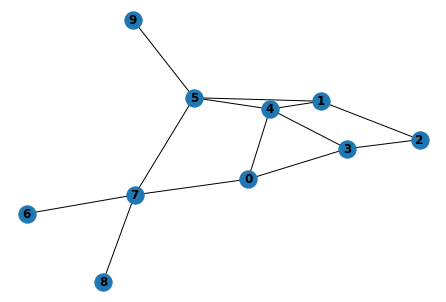

In [2]:
n = 10
G = nx.erdos_renyi_graph(n, 0.3)
nx.draw(G, with_labels=True, font_weight='bold')

#### Adjacency & Degree Matrix

In [3]:
from networkx.linalg.graphmatrix import adjacency_matrix

A = adjacency_matrix(G).toarray()
A

array([[0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [4]:
# D = degree_matrix**(-1/2)
D = np.sum(A, axis=0)
D = 1/np.sqrt(D)
D = np.diag(D)
D

array([[0.57735027, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

#### Laplacian and eigenvalues decomposition

In [5]:
# normalized Laplacian
L = np.eye(n) - D@A@D

# eigen values & eigen vectors
lambd, U = np.linalg.eigh(L)

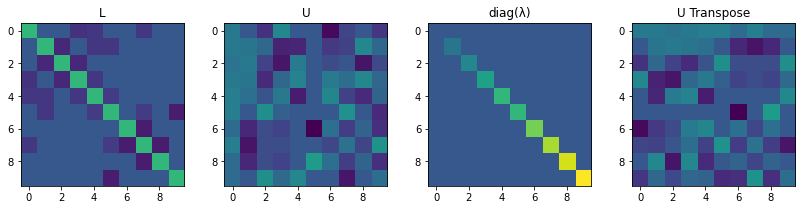

In [6]:
mini = np.min([L, U, np.diag(lambd), U.T])
maxi = np.max([L, U, np.diag(lambd), U.T])

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=mini, vmax=maxi))

plt.figure(figsize=(14,3))
plt.subplot(1,4,1)
plt.imshow(L, vmin = mini , vmax = maxi)
plt.title('L')

plt.subplot(1,4,2)
plt.imshow(U, vmin = mini , vmax = maxi)
plt.title('U')

plt.subplot(1,4,3)
plt.imshow(np.diag(lambd), vmin = mini , vmax = maxi)
plt.title('diag(λ)')

plt.subplot(1,4,4)
plt.imshow(U.T, vmin = mini , vmax = maxi)
plt.title('U Transpose')

#plt.colorbar(sm)
plt.show()

In [7]:
# check the decomposiyion
np.allclose(L, U@np.diag(lambd)@U.T)

True

#### Set nodes attributes

In [8]:
# each of the 10 nodes will have a single value
H = np.array([0.01, 0.02, 0.1, 0.12, 0.09, 0.88, 0.91, 0.77, 0.82, 0.95])

#### Fourrier transform

In [9]:
# fourrier transform
x_t = U.T@H

# inverse fourrier transform
x = U@x_t

np.allclose(x, H)

True

#### Spectral filtering

We will apply, low-pass, high-pass and band-pass filtering to our graph and then visualize the resulting node attributes.

In [10]:
# handcrafted filters
low_pass = np.array([1, 1, 0.9, 0.8, 0.5, 0, 0, 0, 0, 0])
high_pass = np.flip(low_pass)
band_pass = np.array([0, 0, 0.5, 0.8, 1, 1, 0.8, 0.5, 0, 0])

# perform filtering
H_low_filtered = U @ np.diag(low_pass * lambd) @ U.T @ H
H_high_filtered = U @ np.diag(high_pass * lambd) @ U.T @ H
H_band_filtered = U @ np.diag(band_pass * lambd) @ U.T @ H

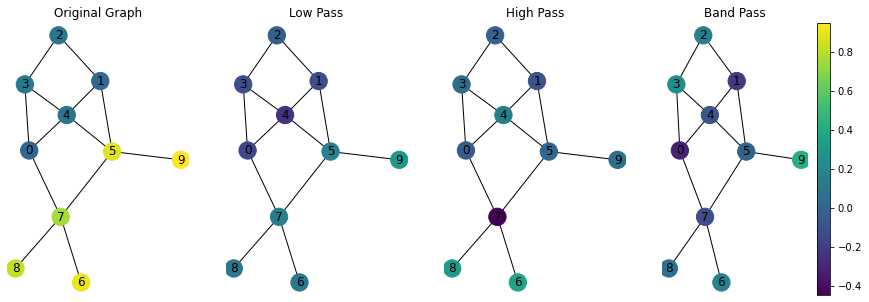

In [12]:
my_pos = nx.spring_layout(G, seed = 42) # keep the disposition of the graph
vmin = np.min([H, H_low_filtered, H_high_filtered])
vmax = np.max([H, H_low_filtered, H_high_filtered])

plt.figure(figsize=(15,5))
plt.subplot(141)
plt.title("Original Graph")
nx.draw(G, node_color=H, pos = my_pos, with_labels=True, vmin=vmin, vmax=vmax)
plt.subplot(142)
plt.title("Low Pass")
nx.draw(G, node_color=H_low_filtered, pos = my_pos, with_labels=True, vmin=vmin, vmax=vmax)
plt.subplot(143)
plt.title("High Pass")
nx.draw(G, node_color=H_high_filtered, pos = my_pos, with_labels=True, vmin=vmin, vmax=vmax)
plt.subplot(144)
plt.title("Band Pass")
nx.draw(G, node_color=H_band_filtered, pos = my_pos, with_labels=True, vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
plt.colorbar(sm)
plt.show()